In [93]:
# read in file

import pandas as pd
df = pd.read_csv('Data/beer.csv')
df

,Brand,Brewery,Calories,Carbohydrates
0,American Amber Lager,Straub Brewery,136,10.5
1,American Lager,Straub Brewery,132,10.5
2,American Light,Straub Brewery,96,7.6
3,Anchor Steam,Anchor,153,16.0
4,Anheuser Busch Natural Light,Anheuser Busch,95,3.2
...,...,...,...,...
148,Yuengling Ale,D.G. Yuengilng,145,10.0
149,Yuengling Porter,D.G. Yuengilng,150,14.0
150,Yuengling Premium Beer,D.G. Yuengling,135,12.0
151,Yuengling Light,D.G. Yuengling,98,6.6


In [94]:
df.describe()

,Calories,Carbohydrates
count,153.000000,153.000000
mean,154.078431,11.960131
std,44.492538,4.905587
min,55.000000,1.900000
25%,129.000000,8.600000
50%,150.000000,12.000000
75%,166.000000,14.300000
max,330.000000,32.100000


Text(0, 0.5, 'Calories')

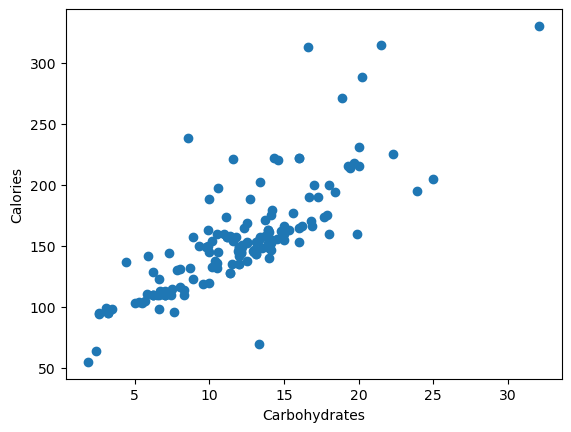

In [14]:
# Get an idea what data looks like
import matplotlib.pyplot as plt
x = df['Carbohydrates']
y = df['Calories']
plt.scatter(x,y)
plt.xlabel('Carbohydrates')
plt.ylabel('Calories')

In [15]:
# Correlation test
import scipy.stats
scipy.stats.pearsonr(x,y)

(0.7979026501845783, 5.162380076478407e-35)

In [16]:
scipy.stats.spearmanr(x,y)

SpearmanrResult(correlation=0.8202031342300837, pvalue=1.8687017951903627e-38)

## Pearson R vs Spearman Rho?

- Correlation is the degree to which two variables are linearly related. 
- Important to remember that correlation doesn't imply causation.
- Pearson's R ranges from +1 to -1
- Spearman's rank correlation coefficient is a nonparametric measure of rank correlation
    - Spearman's rho explains how well two variables can be described using a montonic function

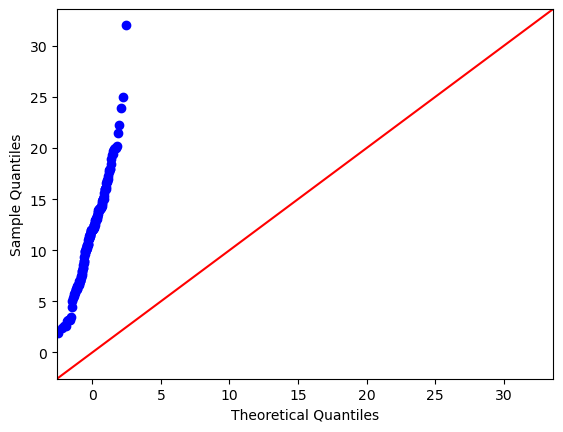

In [42]:
# Generating QQ Plot for Carbohydrates (X)
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = sm.qqplot(x,line='45')
plt.show()

# figure out how to add titles

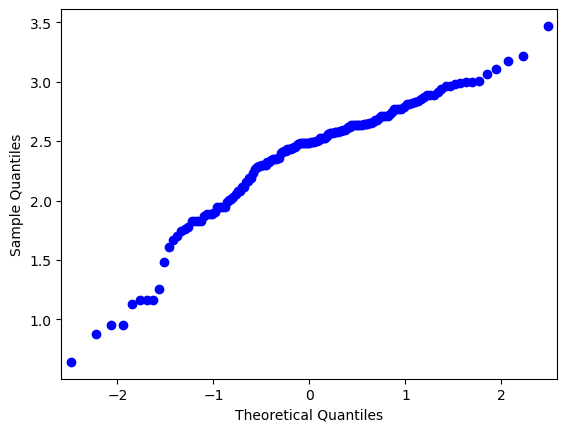

In [45]:
# we can try normalizing the data more by applying a log function
import math
import numpy as np

fig = sm.qqplot(np.log(x))
plt.show()


In [46]:
## QQ line kinda fucked up

In [58]:
# Create model

import numpy as np
from sklearn.linear_model import LinearRegression

model  = LinearRegression()

In [73]:
# convert to array and reshape
x = np.array(x)
x = (x.reshape(-1,1))

In [74]:
model.fit(x,y)

LinearRegression()

In [75]:
# interpreting model

In [76]:
print(f"intercept: {model.intercept_}")

intercept: 67.52544655722316


In [77]:
print(f"slope: {model.coef_}")

slope: [7.23679254]


In [78]:
# display intercept, slope and r-squared value

In [79]:
print(model.intercept_, model.coef_, model.score(x,y))

67.52544655722316 [7.23679254] 0.6366486391715738


In [82]:
# lets train test split

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.33,random_state=42)

In [86]:
reg = linear_model.LinearRegression()

In [87]:
reg.fit(x_train,y_train)

LinearRegression()

In [90]:
print(reg.coef_)

[7.03971243]


In [91]:
y_pred = reg.predict(x_test)

In [92]:
y_pred

array([ 86.0530422 , 118.43571937, 195.87255607, 139.55485665,
       106.46820824, 158.5620802 ,  87.46098469, 114.91586315,
       125.47543179, 131.81117298, 100.13246706, 157.15413772,
       167.00973512, 150.81839653, 167.71370636, 121.25160434,
       152.93031026, 115.6198344 , 187.42490116, 188.83284364,
       118.43571937, 190.94475737, 169.82562009, 183.2010737 ,
       107.87615073, 157.15413772, 157.15413772, 207.8400672 ,
       161.37796517, 202.20829725, 169.12164884, 120.5476331 ,
       109.28409321,  82.53318599, 112.80394943, 195.16858483,
       167.00973512, 165.60179263, 198.68844104, 205.02418222,
       147.29854032, 167.00973512, 153.6342815 , 186.72092991,
        91.68481214, 149.41045405, 171.93753382, 112.80394943,
       127.58734552, 121.95557558, 193.76064234])

In [99]:
y_pred[1]

118.43571936752184

In [103]:
type(y_pred)

numpy.ndarray

In [105]:
y_test = np.array(y_test)

In [112]:
y_pred[1]

118.43571936752184

In [113]:
y_test[1]

110

In [120]:
import math

residuals = []
for i in range(len(y_pred)):
    residual = abs(y_pred[i] - y_test[i])
    residuals.append(residual)
    

In [125]:
import math
import statistics
def rmse(param):
    val = 0
    for each in param:
        val += each**2
    mean = val/len(param)
    return math.sqrt(mean)

In [131]:
rmse(residuals)

21.766470475241665

In [127]:
from sklearn.metrics import mean_squared_error

In [129]:
print(mean_squared_error(y_test,y_pred))

473.7792369495672


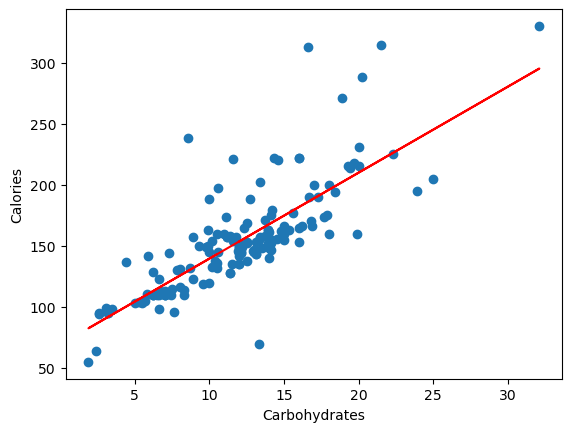

In [137]:
# Get an idea what data looks like
import matplotlib.pyplot as plt
x = df['Carbohydrates']
y = df['Calories']
plt.scatter(x,y)
plt.xlabel('Carbohydrates')
plt.ylabel('Calories')


line = (reg.coef_ * x) + reg.intercept_
plt.plot(x,line, color = 'red')